In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

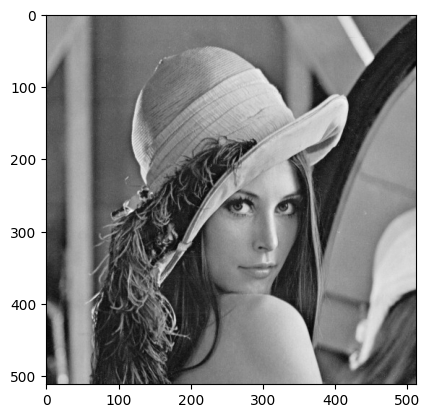

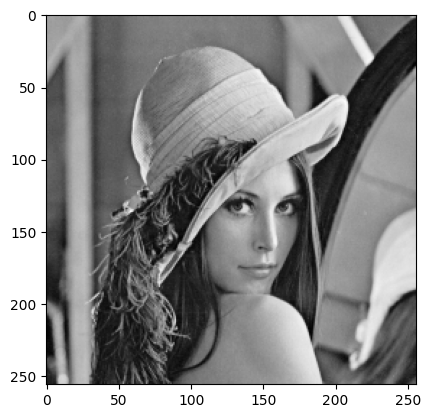

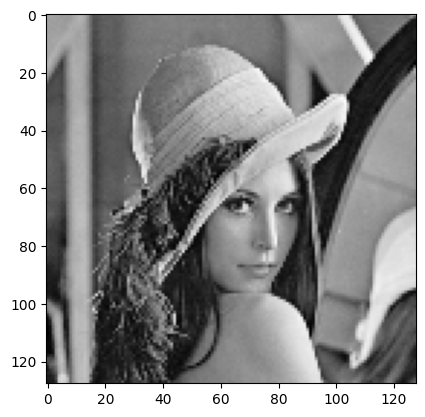

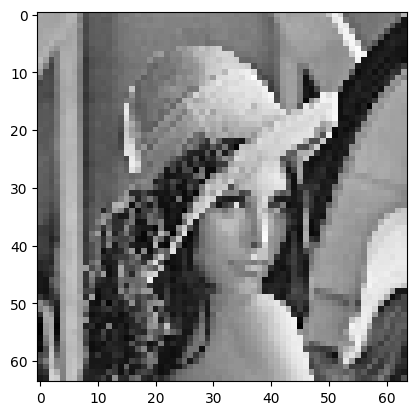

In [7]:
src = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
h, w = src.shape[:2]

half_src = cv2.resize(src, (h // 2, w // 2))
quarter_src = cv2.resize(src, (h // 4, w // 4))
octa_src = cv2.resize(src, (h // 8, w // 8))

plt.imshow(src, cmap='gray')
plt.show()
plt.imshow(half_src, cmap='gray')
plt.show()
plt.imshow(quarter_src, cmap='gray')
plt.show()
plt.imshow(octa_src, cmap='gray')
plt.show()

In [13]:
def my_downsampling(src, gap):
    h, w = src.shape[:2]
    dst = np.zeros((h // gap, w // gap))

    for i in range(h // gap):
        for k in range(w // gap):
            dst[i, k] = src[i*gap, k*gap]

    return dst

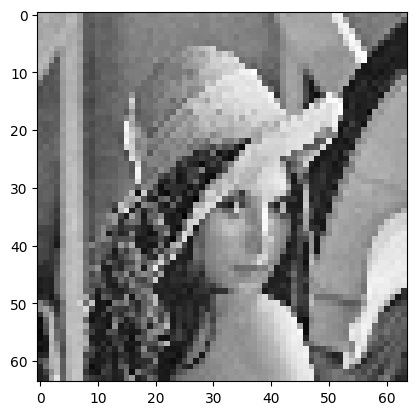

In [14]:
dst = my_downsampling(src, 8)
plt.imshow(dst, cmap='gray')
plt.show()

In [8]:
def my_downsampling(src, gap):
    dst = src[::gap, ::gap]
    return dst

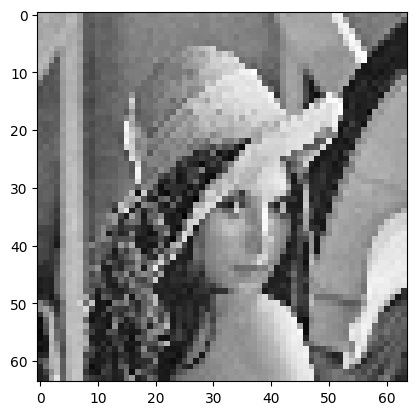

In [9]:
dst = my_downsampling(src, 8)
plt.imshow(dst, cmap='gray')
plt.show()